Using [UC Irvine Heart Disease dataset](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease). The modified cleve.mod version was used. <b>Rename cleve.mod to clevemod.txt<b>.

Full citation: Janosi, Andras, Steinbrunn, William, Pfisterer, Matthias, Detrano, Robert & M.D., M.D.. (1988). Heart Disease. UCI Machine Learning Repository.

This is Dr. Detrano's database modified to be a real MIXED dataset.

Attributes: 8 symbolic, 6 numeric.
  Age; sex; chest pain type (angina, abnang, notang, asympt)
  Trestbps (resting blood pres); cholesteral; fasting blood sugar < 120
  (true or false); resting ecg (norm, abn, hyper); max heart rate; 
  exercise induced angina (true or false); oldpeak; slope (up, flat, down)
  number of vessels colored (???); thal (norm, fixed, rever). Finally, the
  class is either healthy (buff) or with heart-disease (sick).

# Import dataset and clean

In [69]:
import csv
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dislpay full column widths and all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Uncomment the code cell below to convert the original tab-delimited clevemod.txt file into a .csv file.

In [3]:
# convert the tab delimited .txt file into a .csv file

# with open(yourfilein) as f_in, open(yourfileout, 'w') as f_out:
#     o = csv.writer(f_out)
#     for line in f_in:
#         o.writerow(line.split())

In [4]:
cv_df = pd.read_csv('/media/veracrypt3/Cloud/Datasets/clevemod.csv')

In [5]:
cv_df.head()

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,num_vessel_colored,thal,class,unknown
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [6]:
# the column unknown was labelled by me, it's meaning is not explained in the info above so let's just drop it
cv_df.drop(['unknown'], axis=1, inplace=True)

cv_df.head()

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,num_vessel_colored,thal,class
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff


In [7]:
cv_df.shape # should be 303 rows and 14 columns

(303, 14)

In [8]:
cv_df.describe(include='all')

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,num_vessel_colored,thal,class
count,303.000000,303,303,303.000000,303.000000,303,303,303.000000,303,303.000000,303,303,303,303
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,5,4,2
top,NaN,male,asympt,NaN,NaN,fal,norm,NaN,fal,NaN,up,0.0,norm,buff
freq,NaN,207,143,NaN,NaN,258,152,NaN,204,NaN,142,175,166,165
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,NaN,NaN,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,NaN,NaN,NaN


In [9]:
cv_df.dtypes

age                            float64
sex                             object
chest_pain_type                 object
trestbps                       float64
cholesterol                    float64
fasting_blood_sugar_less120     object
rest_ecg                        object
max_hr                         float64
exercise_induced_angina         object
oldpeak                        float64
slope                           object
num_vessel_colored              object
thal                            object
class                           object
dtype: object

In [10]:
# see if there are any missing values
cv_df.isnull().sum()

age                            0
sex                            0
chest_pain_type                0
trestbps                       0
cholesterol                    0
fasting_blood_sugar_less120    0
rest_ecg                       0
max_hr                         0
exercise_induced_angina        0
oldpeak                        0
slope                          0
num_vessel_colored             0
thal                           0
class                          0
dtype: int64

In [11]:
cv_df['chest_pain_type'].value_counts()

asympt    143
notang     87
abnang     50
angina     23
Name: chest_pain_type, dtype: int64

# Visualize the data

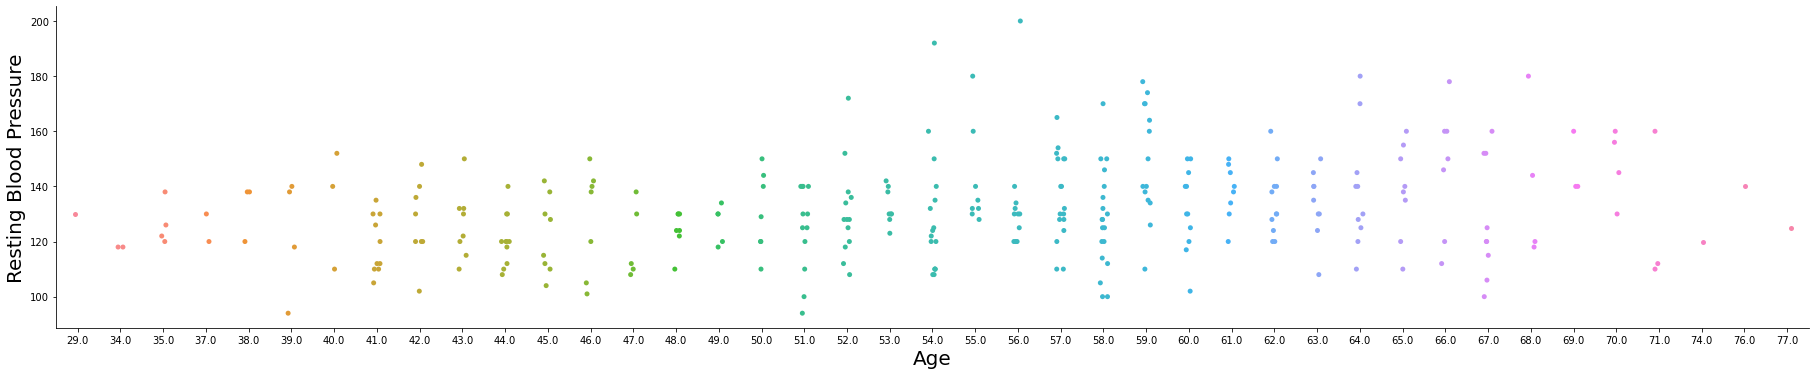

In [14]:
sns.catplot(x='age', y='trestbps', data=cv_df, aspect=5) 
plt.ylabel('Resting Blood Pressure', fontsize=20) 
plt.xlabel('Age', fontsize=20) 
plt.show()

Some resting blood pressures are seen to be considerably higher starting at age 52. 

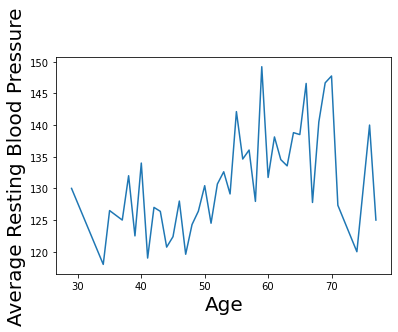

In [13]:
age_restbp_group = cv_df.groupby(['age']).mean('trestbps').reset_index()
sns.lineplot(x='age', y='trestbps', data=age_restbp_group)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Average Resting Blood Pressure', fontsize=20)
plt.show()

General trend of increasing resting blood pressure with age. However, some of the younger and older ages have few datapoints so are not well representative of their age groups.

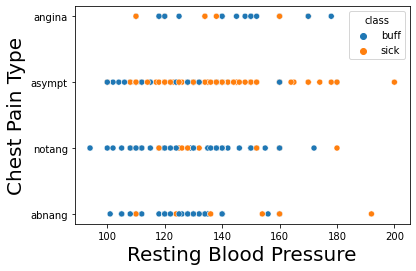

In [15]:
sns.scatterplot(x='trestbps', y='chest_pain_type', hue='class', data=cv_df)
plt.xlabel('Resting Blood Pressure', fontsize=20)
plt.ylabel('Chest Pain Type', fontsize=20)
plt.show()

There appears to be a significant number of asymptomatic patients who have heart disease (sick). This ranges across all resting blood pressures, although less than around 110 are all healthy. 

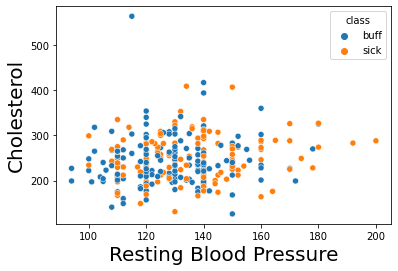

In [17]:
sns.scatterplot(x='trestbps', y='cholesterol', hue='class', data=cv_df)
plt.xlabel('Resting Blood Pressure', fontsize=20)
plt.ylabel('Cholesterol', fontsize=20)
plt.show()

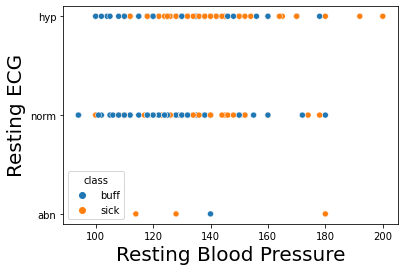

In [18]:
sns.scatterplot(x='trestbps', y='rest_ecg', hue='class', data=cv_df)
plt.xlabel('Resting Blood Pressure', fontsize=20)
plt.ylabel('Resting ECG', fontsize=20)
plt.show()

Vast majority of patients with hyp resting ECG have heart disease while majority of normal ECG are healthy.

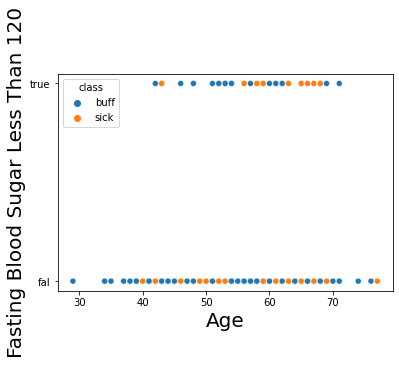

In [45]:
sns.scatterplot(x='age', y='fasting_blood_sugar_less120', hue='class', data=cv_df)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Fasting Blood Sugar Less Than 120', fontsize=20)
plt.show()

# Transform and preprocess dataset

Fortunately, this dataset already provides a processed version where all data is converted to numerical for easy model traning.

In [56]:
proc_df = pd.read_csv('/media/veracrypt3/Cloud/Datasets/processed.cleveland.data',
                     header=None,
                     names=[
                         'age',
                         'sex',
                         'chest_pain_type',
                         'trestbps',
                         'cholesterol',
                         'fasting_blood_sugar_less120',
                         'rest_ecg',
                         'max_hr',
                         'exercise_induced_angina',
                         'oldpeak',
                         'slope',
                         'num_vessel_colored',
                         'thal',
                         'class',
                     ])

In [57]:
proc_df.head()

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,num_vessel_colored,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [58]:
proc_df.shape  # should be same shape as previous dataset

(303, 14)

In [59]:
# check for missing values
proc_df.isnull().sum()

age                            0
sex                            0
chest_pain_type                0
trestbps                       0
cholesterol                    0
fasting_blood_sugar_less120    0
rest_ecg                       0
max_hr                         0
exercise_induced_angina        0
oldpeak                        0
slope                          0
num_vessel_colored             0
thal                           0
class                          0
dtype: int64

In [60]:
# check if float or int
proc_df.dtypes

age                            float64
sex                            float64
chest_pain_type                float64
trestbps                       float64
cholesterol                    float64
fasting_blood_sugar_less120    float64
rest_ecg                       float64
max_hr                         float64
exercise_induced_angina        float64
oldpeak                        float64
slope                          float64
num_vessel_colored              object
thal                            object
class                            int64
dtype: object

In [61]:
# The column num_vessel_colored has a ? in some rows, so those rows need to be dealt with. We'll just drop them for now.
proc_df.drop(['num_vessel_colored', 'thal'], axis=1, inplace=True)

proc_df.head()

,age,sex,chest_pain_type,trestbps,cholesterol,fasting_blood_sugar_less120,rest_ecg,max_hr,exercise_induced_angina,oldpeak,slope,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0


In [62]:
X = np.asarray(proc_df.loc[:, proc_df.columns != 'class'])  # select all columns except 'class'
X[0:5]

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ],
       [ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ]])

In [63]:
Y = np.asarray(proc_df['class'])
Y[0:5]

array([0, 2, 1, 0, 0])

In [64]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.94872647,  0.68620244, -2.25177456,  0.75752504, -0.2649003 ,
         2.394438  ,  1.01668424,  0.01719733, -0.69663055,  1.08733806,
         2.27457861],
       [ 1.39200191,  0.68620244,  0.87798549,  1.61121989,  0.76041519,
        -0.41763453,  1.01668424, -1.82190531,  1.43548113,  0.39718162,
         0.64911323],
       [ 1.39200191,  0.68620244,  0.87798549, -0.6652997 , -0.34228261,
        -0.41763453,  1.01668424, -0.90235399,  1.43548113,  1.34614673,
         0.64911323],
       [-1.93256387,  0.68620244, -0.16526786, -0.0961698 ,  0.06397448,
        -0.41763453, -0.99674925,  1.63735918, -0.69663055,  2.12257273,
         2.27457861],
       [-1.48928843, -1.4572959 , -1.20852121, -0.0961698 , -0.82592199,
        -0.41763453,  1.01668424,  0.98053681, -0.69663055,  0.31091206,
        -0.97635214]])

# Train/test split dataset

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (242, 11) (242,)
Test set: (61, 11) (61,)


# Model training (Logistic Regression)

In [66]:
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train, Y_train)

In [67]:
yhat = LR.predict(X_test)
yhat

array([3, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 4, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, 0])

In [68]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.14029998, 0.10718894, 0.28182709, 0.35586987, 0.11481412],
       [0.59471986, 0.12042202, 0.08681988, 0.13798375, 0.06005448],
       [0.6732349 , 0.10030533, 0.08839888, 0.084283  , 0.05377789],
       [0.71082251, 0.07961159, 0.07713362, 0.08444548, 0.04798681],
       [0.11143569, 0.08370883, 0.3240538 , 0.31938718, 0.1614145 ],
       [0.09958536, 0.30708134, 0.19934151, 0.25865829, 0.1353335 ],
       [0.46359313, 0.16058531, 0.16935291, 0.12544877, 0.08101988],
       [0.64612046, 0.07516501, 0.1186212 , 0.07636612, 0.08372721],
       [0.68471899, 0.14968288, 0.06485991, 0.05119628, 0.04954195],
       [0.06371115, 0.29092624, 0.23328179, 0.25721   , 0.15487082],
       [0.66804269, 0.09265599, 0.07065517, 0.10070169, 0.06794445],
       [0.10657647, 0.27739037, 0.2287773 , 0.24871108, 0.13854478],
       [0.24074862, 0.12880781, 0.22364975, 0.15782195, 0.24897187],
       [0.16609626, 0.41950233, 0.14866522, 0.16231489, 0.1034213 ],
       [0.69754814, 0.05247114, 0.

# Evaluation

In [74]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80        32
           1       0.10      0.09      0.10        11
           2       0.33      0.14      0.20         7
           3       0.33      0.12      0.18         8
           4       0.00      0.00      0.00         3

    accuracy                           0.54        61
   macro avg       0.29      0.26      0.26        61
weighted avg       0.47      0.54      0.48        61

